In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Goal Projects

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. 
- These indicators can be weather type, 
- time of the day, time of the week, etc. 

For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [11]:
trafics = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
trafics.head(5)
trafics.tail(5)
trafics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# About the dataset
the dataset documentations located approxiamtly midway between Minnepolis and Saint Paul recorded in the trafic data.aso this means that the result of our analyisis will be about the westbound traffic in the proximity of that stations.

in other words , we should avoid genreralizing our results for the entire I-94 highwey

Analyis 1

lets examine the dataset column Trafic_volume, so we can grasp any data in there


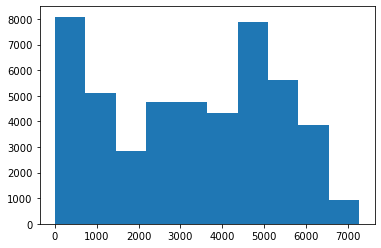

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [12]:
traffics_volume = trafics["traffic_volume"]
plt.hist(trafics['traffic_volume'])
plt.show()

#lets see observations using describe
trafics.describe()

Based on the Statisctis and Histrogram we can conclude or get some hypotesis,this include

1. The daytime and Nighttime Influence the traffic Volume
    for example the if the rain , the trafics may go higher with Vs in Snow or clouds.

# Further research in Slowness in traffics
Previously, we analyzed the distribution of traffic_volume and found the following:

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

1. Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
2. Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [13]:
trafics['date_time'] = pd.to_datetime(trafics['date_time'])

#isolate the daytime_and nightetime data
day = trafics[trafics['date_time'].dt.hour.between(7,18)]
night = trafics[~trafics['date_time'].dt.hour.between(7,18)]


#for further analyis,i tends to see  the max in each day and night

day.describe()
#night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


# Trafics Volume Day Vs Night

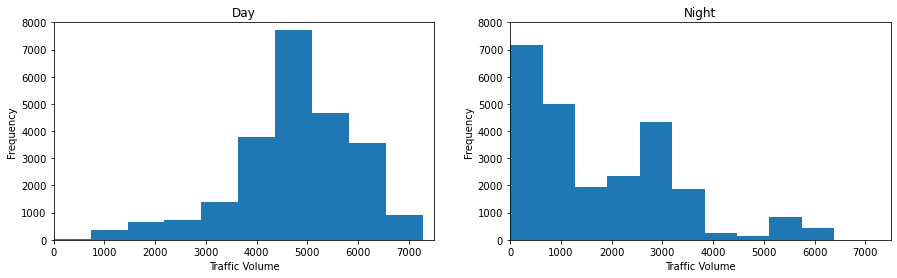

In [14]:

plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
day.traffic_volume.hist()
plt.title('Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(0,7500)
plt.grid(False)

plt.subplot(1,2,2)
night.traffic_volume.hist()
plt.title('Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(0,7500)
plt.grid(False)

plt.show()


# Time_Indicators
Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

but right now,lets focuses on day vs night litle bit more 

In [23]:
day_copy = day.copy()

months = day.copy()['date_time'].dt.month
day_by_month = day_copy.groupby('month').mean()
day_by_month['traffic_volume']

day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

C:\Users\iamno\AppData\Local\Temp\ipykernel_13196\1377785962.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [24]:
night_copy = night.copy()

night_copy['month'] = night['date_time'].dt.month
night_by_month = night_copy.groupby('month').mean()
night_by_month['traffic_volume']



month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

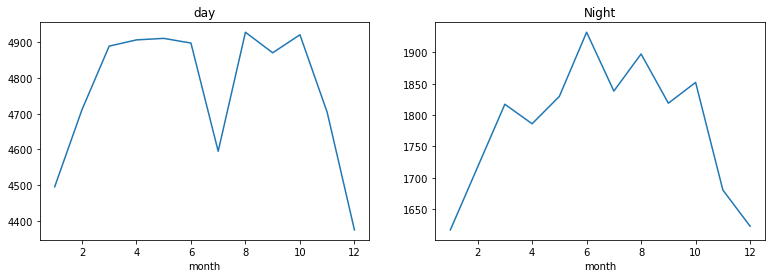

In [25]:
plt.figure(figsize =(13,4))

plt.subplot(1,2,1)
day_by_month['traffic_volume'].plot.line()
plt.title('day')

plt.subplot(1,2,2)
night_by_month['traffic_volume'].plot.line()
plt.title('Night')

plt.show()

We can conclude that
1. the day nights tends to be more centralized histrogram vs the day tends to become more aggresive at certain points on in given day /time

2. at Highest Level, the night is more highest during the 19:00 times

In [ ]:
#lets examine this litle bit more, we now grasp the data by dayofthe week!

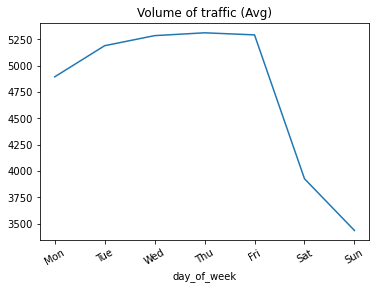

In [44]:
day_copy = day.copy()

day_copy['day_of_week'] = day_copy['date_time'].dt.dayofweek
week_by_month = day_copy.groupby('day_of_week').mean()
week_by_month['traffic_volume']

plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
week_by_month['traffic_volume'].plot.line()
plt.title('Volume of traffic (Avg)')
plt.xticks(rotation=30, ticks=[0, 1, 2, 3, 4, 5, 6],
           labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

Analyze the line plot. Do you notice any difference between business days and the weekend?
The answer is yes, at certain level. the weekday/ bussines days tends to be more aggresive with vs the weekend


# Analyze the Data litle bit further
Analyze the Data, But  we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [28]:
trafics['hour'] = trafics['date_time'].dt.hour
bussiness_days = trafics.copy()[trafics['day_of_week'] <= 4] # 4 == Friday
weekend = trafics.copy()[trafics['day_of_week'] >= 5] # 5 == Saturday

by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


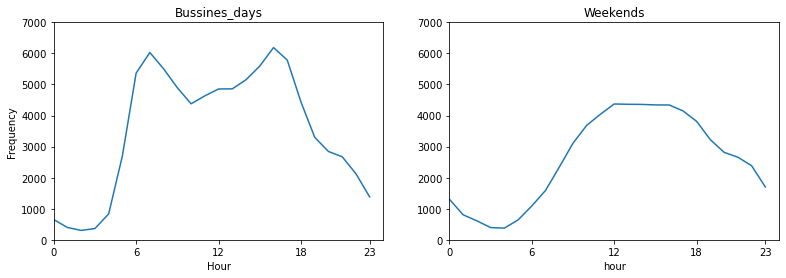

In [29]:

plt.figure(figsize =(13,4))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xticks(ticks = [0,6,12,18,23])
plt.xlim(0,24)
plt.ylim(0,7000)
plt.title('Bussines_days')
plt.ylabel('Frequency')
plt.xlabel('Hour')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xticks(ticks = [0,6,12,18,23])
plt.xlim(0,24)
plt.ylim(0,7000)
plt.title('Weekends')

plt.show()

# What we get?
- in bussines hours, greater traffic between 6hs and 18hs , especily in the extremes in times of entry and exit of work
- During weekends, the traffic is lower than busssines days,heighest frequency in afternoon with landing betweend 11hhs and 14hs
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

# Traffic Vs Weather


In [30]:
trafics.corr()['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
day_of_week      -0.149544
hour              0.352401
Name: traffic_volume, dtype: float64

(230.0, 320.0)

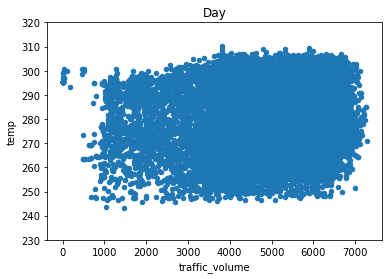

In [31]:
day.plot.scatter('traffic_volume', 'temp')
plt.title('Day')
plt.ylim(230,320)

#the strognest correaltions is temp,but i think tempt not strongest, as you can see in the scatterplot bellow

(230.0, 320.0)

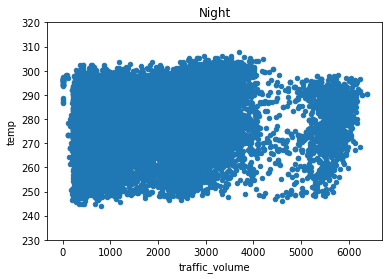

In [32]:
night.plot.scatter('traffic_volume', 'temp')
plt.title('Night')
plt.ylim(230,320)

In [ ]:
trafics.head()

# Last Weather Types
Previously, we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

<function matplotlib.pyplot.show(close=None, block=None)>

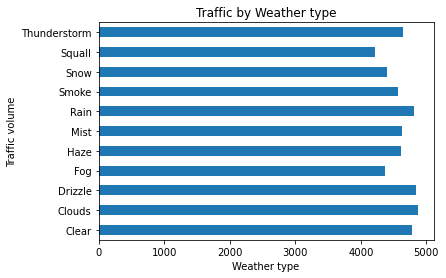

In [37]:
# Averages for the unique values in weather_main column
by_weather_main = day.groupby('weather_main').mean()

# Averages for the unique values in weather_description column
by_weather_dsecription = day.groupby('weather_description').mean()

# Let's visualise our results
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic by Weather type')
plt.xlabel('Weather type')
plt.ylabel('Traffic volume')
plt.show

The barchart shows that there is no weather type exceeding 5000 cars. While lesser traffic is seen in Fog wheather type, a higher traffic is seen duringn thunder storms. There is no clear indication of weather type impacting traffic volume. Let us look at the that of weather description.



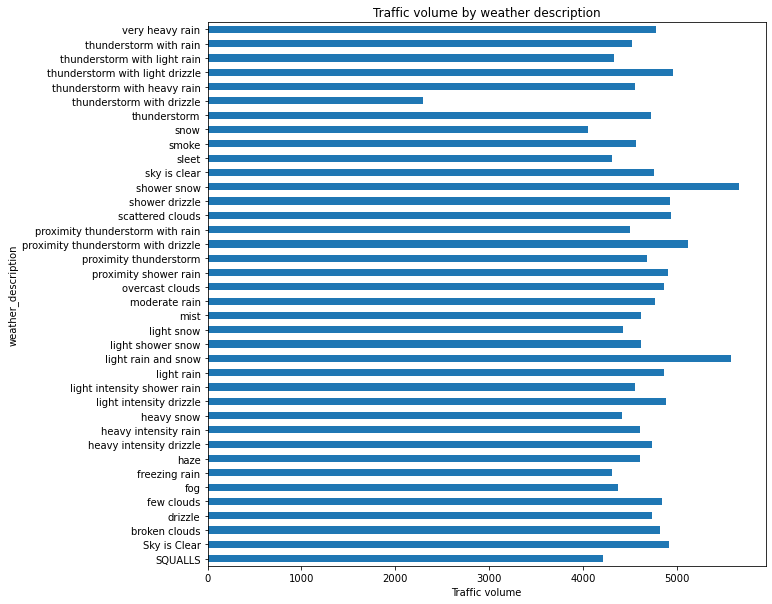

In [38]:
by_weather_dsecription['traffic_volume'].plot.barh(figsize=(10,10))
plt.title('Traffic volume by weather description')
plt.xlabel('Weather description')
plt.xlabel('Traffic volume')
plt.show()

hree weather descriptions exceeded 5000 cars: clear sky,

- Shower snow
- Proximity thunderstorm with drizzle
- Light rain and snow.
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking

# Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle